# Multiple Output GP on sin data
Thia file runs the multiple output gp model on simulated sin data. There are two datasets, one basic sin(2x) function and another shifted version of the original.

## 1. Simulate the data
I will simulate 80 datapoints using the following functions:



1.$$sin(2X) $$


2.$$ sin(2*\sqrt(2)*x+pi/4) $$

The second function simply represents a shifted version of the first, so there is a clear shared relationship between the two.

In [1]:
import math;
import numpy as np;
# Set number of datapoints
n = 80;
# Get pi
pi = math.pi;
# 2 * sine function
norm_sin = lambda x: math.sin(2 * x)
# Shifted sine function
shift_sin = lambda x: math.sin(2 *math.sqrt(2) * x + pi/4);
# Time series
T = np.linspace(0, 4 * pi, num = n)                                  

Now ive defined my functions and samples i can apply the functions to the samples to generate two sets of results:

In [2]:
y1 = []
y2 = []

for i in range(len(T)):
    
    y1.append(norm_sin(T[i]))
    
    y2.append(shift_sin(T[i]))
print(y2)

[0.7071067811865475, 0.9442504271117126, 0.9934604590973422, 0.8449426330662286, 0.5282563656509353, 0.10643154067415306, -0.3365762920109012, -0.7125955408332401, -0.9467873131506157, -0.992540556573953, -0.8407490296453546, -0.5216237117851303, -0.09867992960904463, 0.3439040616283739, 0.7180410272732268, 0.9492667044105578, 0.9915603808518032, 0.8365043707456514, 0.5149593817027218, 0.09092232608854364, -0.3512109472651096, -0.7234429098229057, -0.9516884503275743, -0.9905199914532221, -0.8322089141290528, -0.50826378010303, -0.08315920120229335, 0.35849650520184656, 0.728800860446571, 0.9540524038382799, 0.9894194515570865, 0.8278629206422361, 0.5015373135843835, 0.07539102637523597, -0.36576029301446117, -0.73411455377634, -0.9563584213888046, -0.9882588279949819, -0.8234666542007982, -0.4947803906194079, -0.0676182733389685, 0.37300186960084736, 0.7393836671319005, 0.958606362943504, 0.9870381912471474, 0.819020381773212, 0.487993421530242, 0.059841414103105124, -0.38022079520771

So now we have simulated datapoints for the basic sine function and the shifted version.

## Inspecting the data 

Now i take a look at how this data looks when i plot it:

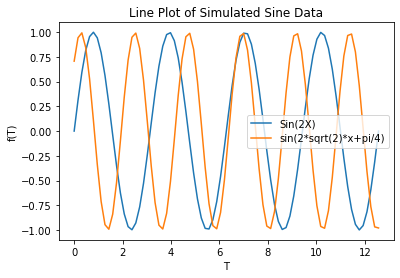

In [3]:
import matplotlib.pyplot as plt

plt.plot(T, y1, label = 'Sin(2X)')
plt.plot(T, y2, label = 'sin(2*sqrt(2)*x+pi/4)')

plt.legend()
plt.xlabel('T')
plt.ylabel('f(T)')
plt.title('Line Plot of Simulated Sine Data')

plt.show()

As we can see from above, the plot shows the normal sine wave and then the second one as a slightly shifted version of the first. This gives indication of the relationship between the two different functions which i aim to model in a multiple output gaussian process.

In order to simulate data more akin to real life I will add some noise to the above data. This can be done by sampling from a gaussian distribution.

In [4]:
noise1 = np.random.normal(0,0.01,80)
noise2 = np.random.normal(0,0.01,80)

Now lets see how this noise effects the data:

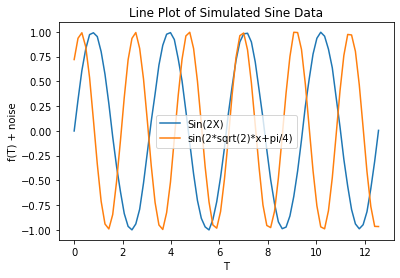

In [5]:
import matplotlib.pyplot as plt

plt.plot(T, y1 + noise1, label = 'Sin(2X)')
plt.plot(T, y2 + noise2, label = 'sin(2*sqrt(2)*x+pi/4)')

plt.legend()
plt.xlabel('T')
plt.ylabel('f(T) + noise')
plt.title('Line Plot of Simulated Sine Data')

plt.show()

As we can see above the data is now much more realistic.

I add the noise to the data below:

In [6]:
# Time series 1
t1 = T
# sine(2X) + noise
Y1 = y1 + noise1
# Time series 2
t2 = T
# sin(2*sqrt(2)*x+pi/4) + noise
Y2 = y2 + noise2

I now need to start constructing some of the variables that are required by the model. 
I do this below:

In [7]:
# array for time series
t = [t1, t2]
# array for f(x)
Y = [y for x in [Y1, Y2] for y in x]
# sample size 1
N1 = len(t1)
# sample size 2
N2 = len(t2)
print(len(Y))

160


I can inspect the the arrays:

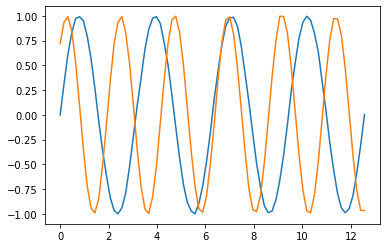

In [8]:
plt.plot(t1, Y1, label = 'Sin(2X)')
plt.plot(t2, Y2, label = 'sin(2*sqrt(2)*x+pi/4)')
plt.show()

Now that I've simulated the data I can start to construct the model itself. 

## 2. Constructing the Model
 In order to construct the model we need to define the hyper parameters as follows from boyle and frean (2005). As a prior i am assuming they follow a normal distribution mean = mu and sd.

In [9]:
#--------Hyper-parameters--------------------------------------------
mean_vi = 0
sd_vi = 0.01

mean_wi = 0
sd_wi = 0.01

mean_fi = 0
sd_fi = 0.01

mean_gi = 0
sd_gi = 0.01

mean_bi = 0
sd_bi = 0.01

mean_mu = 0.5
sd_mu = 1

pr_par = [mean_vi, sd_vi, mean_wi, sd_wi, mean_fi, sd_fi, mean_gi, sd_gi, mean_bi, sd_bi, mean_mu, sd_mu]

Above I generated mean and standard deviations for each of the parameters which can be used to sample them from during estimations.

In [10]:
vi = np.random.normal(mean_vi, sd_vi, 2)
wi = np.random.normal(mean_wi, sd_wi, 2)
fi = np.random.normal(mean_fi, sd_fi, 2)

gi = np.random.normal(mean_gi, sd_gi, 2)
bi = np.random.normal(mean_bi, sd_bi, 2)
mu = np.random.normal(mean_mu, sd_mu, 1)

par = [vi[0], wi[0], fi[0], gi[0], bi[0], vi[1], wi[1], fi[1], gi[1], bi[1], mu] #parameters to estimate; [v1 w1 f1 g1 Beta1 v2 w2 f2 g2 Beta2 mu]
# Checked

Now I run the covariance function to create a covariance matrix for the cross and autocovariances. 

In [11]:
import MOGP as mod

D = mod.Covariance(par, t1, t2)

In [13]:
import pandas as pd
from scipy.linalg import svdvals

lik = mod.log_lik(par,Y,t1,t2,pr_par)
print(lik)

82.52447874017656
[157.98877134 158.14639506 158.29375283 158.4025436  158.47569962
 158.48484397 158.46558962 158.38954623 158.27508632 158.1270225
 157.95979324 157.81021801 157.68386417 157.57153366 157.50687098
 157.48928641 157.51922855 157.59340211 157.72598003 157.88145915
 158.03748459 158.17535707 158.32133893 158.42174952 158.47749239
 158.48558374 158.45047805 158.35364797 158.24152192 158.08922737
 157.92863554 157.77144369 157.63765797 157.54779543 157.50413644
 157.4889999  157.54116057 157.63099626 157.75521413 157.90225646
 158.07317019 158.21378796 158.34425424 158.4384966  158.47927382
 158.48233593 158.43832165 158.33727857 158.19575701 158.05347394
 157.89344212 157.74255155 157.62295075 157.52983426 157.49520261
 157.50328323 157.55951208 157.65775299 157.786853   157.94309504
 158.11340537 158.25089248 158.37709975 158.45716412 158.48751437
 158.46756887 158.40215794 158.30784304 158.15783653 158.00930211
 157.84543341 157.7096049  157.59210575 157.51932421 157.49

The inverse of the matrix tells us whether it is positve definite. If not then we resample the paramters until this is true.

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(0,100,size=(21,109)))

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,31,39,25,11,19,71,41,6,49,93,...,38,35,1,53,5,30,94,28,86,39
1,48,40,17,15,7,38,22,29,9,85,...,28,50,51,41,71,39,78,72,92,84
2,86,43,30,25,52,33,21,18,22,76,...,3,95,43,25,86,31,50,14,42,78
3,58,49,12,17,74,1,18,29,65,1,...,10,52,88,76,60,24,16,87,14,96
4,93,96,2,81,2,81,3,19,47,51,...,27,70,12,77,52,13,90,71,70,50
5,73,92,43,0,39,56,57,78,73,67,...,31,34,78,96,1,14,36,86,34,84
6,64,52,88,0,11,49,31,53,66,56,...,28,90,26,85,66,14,27,16,16,67
7,84,19,69,34,8,74,18,2,15,51,...,81,70,17,52,35,2,87,97,35,76
8,78,81,7,38,87,86,29,25,34,40,...,19,68,9,65,56,52,31,42,15,35
9,38,47,25,93,20,65,25,7,61,40,...,22,72,68,9,53,92,16,51,82,33
